<a href="https://colab.research.google.com/github/angelaaaateng/ftw_python/blob/main/Data_Cleaning_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

The dataset contains information on bookings for two hotels in Portugal (a resort and a city hotel) scheduled to arrive in a period between July 1, 2015 and August 31, 2017.

For both hotels, the same information was collected: 31 variables describing 40,060 observations for the resort and 79,330 observations for the city hotel. That is, the dataset contains information on 119,390 hotel reservations, including those that were canceled. This is real information, so all elements that could identify hotels or customers were removed.



# Import Libraries

In [75]:
# Importing libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Reading and inspecting the data

Let's take a look at the contents of the dataset:

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/hotel_bookings.csv')

In [77]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [78]:
print(df.shape)

(119390, 32)


There are 119,390 observations and 32 columns in the dataset. Now, I'm going to check data types.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

* As it can be seen, 'reservation_status_date' has an object data type, when it should has a date data type. 
* Also, there are missing values in 'children', 'country', 'agent' and 'company' columns. This will be explored in the next section.

In [79]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Data cleaning

## Missing values

Earlier we could see that there were some missing values in the dataset. Let's see exactly how many there are: 

In [80]:
# Number of missing values by column

df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [83]:
# Percentage of missing values by column

round((df.isnull().sum().sort_values(ascending = False) * 100) / len(df), 2)

company                           94.31
agent                             13.69
country                            0.41
children                           0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
hotel                              0.00
previous_cancellations             0.00
days_in_waiting_list               0.00
customer_type                      0.00
adr                                0.00
required_car_parking_spaces        0.00
total_of_special_requests          0.00
reservation_status                 0.00
previous_bookings_not_canceled     0.00
is_repeated_guest                  0.00
is_canceled                        0.00
distribution_channel               0.00
market_segment                     0.00
meal                               0.00
babies                             0.00
adults                             0.00
stays_in_week_nights               0.00


**'Company'** and **'agent'** columns have a very high amount of missing values (94,31% and 13,69%, respectively). One possible option could be to drop down that columns. However, the original article (that can be found [here](https://www.sciencedirect.com/science/article/pii/S2352340918315191)) states the following:

> *In some categorical variables like Agent or Company, “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.*

Then, I'm going to replace null values in those columns with 0 (as they have float64 data types, since the personal information was removed).

On the other hand, the column **'country'** has 0.41% missing values (488 rows affected). In its case, being a categorical variable, I have chosen the mode to replace the null values.

The column **'children'** also has some missing values, but they do not even represent 0.01% of the dataset. Therefore, I have chosen to delete the affected rows (4 rows).

In [85]:
# Replacing NULL values in company and agent columns with 0
values = {'company': 0, 'agent': 0}
df.fillna(value = values, inplace = True)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


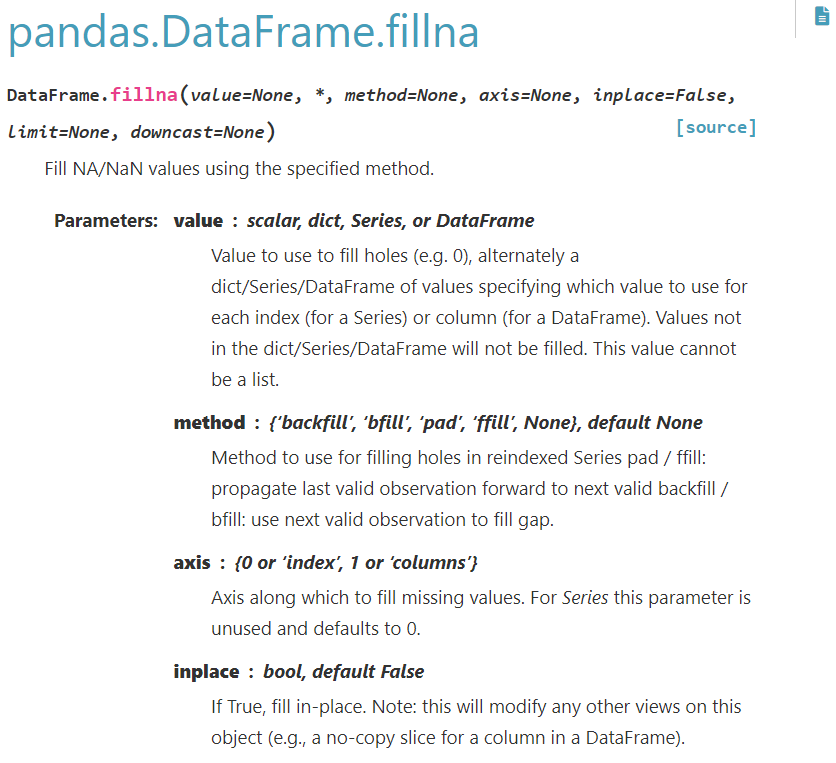

In [86]:
# Replacing NULL values in country column with most frecuent value
df['country'].fillna(value = df['country'].mode()[0], inplace = True)

# Removing rows affected by NULL values in children column
df.dropna(subset = ['children'], inplace = True)

In [87]:
# Rechecking for NULL values in the data set
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

There are no more missing values in the dataset.

## Inconsistent Data

In this step I will look for inconsistent data in the dataset, that is, I will check that the unique values of the categorical columns are correct.

In [88]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Which of the columns above look like categorical columns? 

In [89]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [94]:
# Categorical columns

cat_columns = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 
               'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


# Unique values in each categorical column

print(f"Unique values by categorical columns\n".upper())

for cat_column in cat_columns:
    unique_values = df[cat_column].unique()
    print(f"\n{cat_column}: \n{unique_values}\n")
    print('-' * 70)

# https://stackoverflow.com/questions/57150426/what-is-printf

UNIQUE VALUES BY CATEGORICAL COLUMNS


hotel: 
['Resort Hotel' 'City Hotel']

----------------------------------------------------------------------

is_canceled: 
[0 1]

----------------------------------------------------------------------

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

----------------------------------------------------------------------

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' '

According to this, in the column **'meal'** there are 5 possible results: `['BB' 'FB' 'HB' 'SC' 'Undefined']`.

However, the category 'undefined' actually corresponds to 'SC' (self catering, i.e. no meals are included), as defined in the original article. Therefore, I will replace its value with 'SC'.

In [95]:
# Replacing 'undefined' meal with 'SC'

df['meal'].replace(to_replace = 'Undefined', value = 'SC', inplace = True)

In [96]:
# Rechecking unique values in meal column

df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

There is no more inconsistent data in the dataset. 

## Invalid Data

Now, I'm going to verify if there are any non-logical values in the dataset.

In [97]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,74.830633,10.775518,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,107.142996,53.944751,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


At first glance, it seems that there are outliers in the dataset. For example, we can see that the column 'previous_cancellations' has a maximum value of 26 cancellations, which would imply that some customer made 26 cancellations, which is unlikely. 

On the other hand, the column 'adults' has a maximum of 55 and a minimum of 0 people. The minimum is especially interesting because it would assume that there are hotel reservations for 0 adults, which is not possible since there must be a minimum of 1 adult per reservation (obviously children cannot book hotel rooms). Therefore, I will eliminate rows where the number of adults equals 0.

In [98]:
# Dropping rows with 0 adults

df.drop(df[df['adults'] == 0].index, inplace = True)

In [99]:
# Verification

len(df[df['adults'] == 0])

0

Rows where 'adults' was equal to 0 have been eliminated. I will now check the outliers.

## Outliers

Outliers are extremely large or small values relative to the other points of dataset. I will use box plots and histograms to visualize the distribution of the data and detect outliers.

### What is a boxplot? 
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

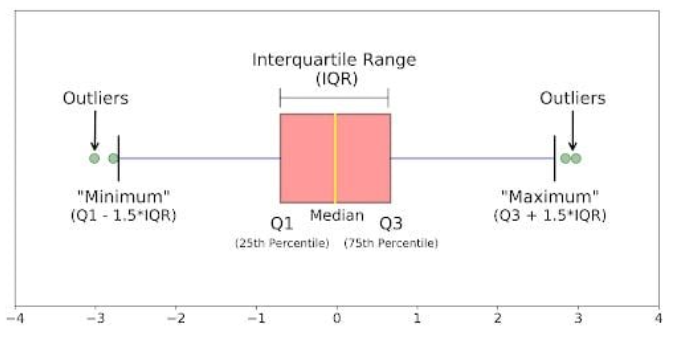

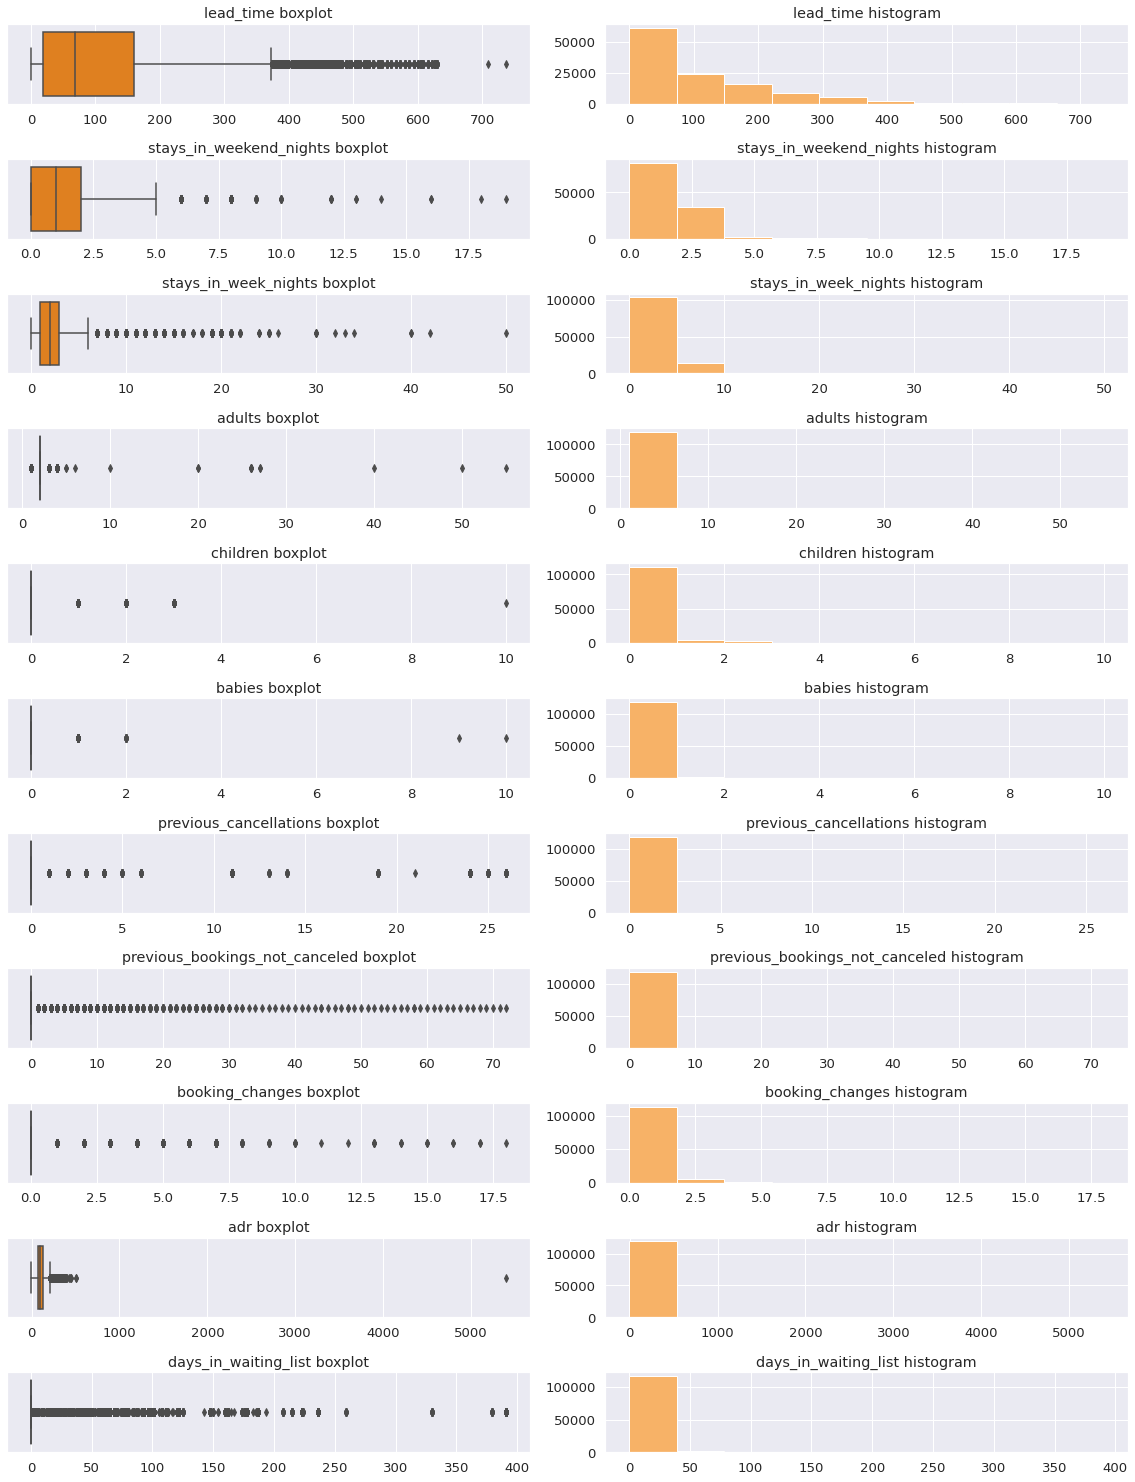

In [100]:
# Columns from `df.describe()` I want to examine

features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'days_in_waiting_list']


# Creating a boxplot and a histogram for outlier detection

n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (16, 28))

for feature in features:
    plt.subplot(15,2,n)
    sns.boxplot(df[feature], palette = 'autumn').set(xlabel = None)
    plt.title(f'{feature} boxplot')
    n = n + 1
    
    plt.subplot(15,2,n)
    plt.hist(df[feature], color = '#f7b267')
    plt.title(f'{feature} histogram')
    n = n + 1
    plt.tight_layout()

Clearly **there are outliers in the dataset**. What is especially relevant is their quantity and the extreme values that some of them have. 

For example, in the adr column we can see an outlier with an approximate value of 5400, far away from the rest of the data points. In this case we could consider that it is an error when entering data in the database.

Nevertheless, in other columns there are outliers with values quite similar to each other. This has made me think that the problem may lie in the fact that the **dataset contains data from two different hotels**. Normally, city hotels are cheaper and can host more diverse types of customers (businessmen attending congresses, airline workers,...) given their centric location. On the contrary, a resort is usually a more expensive accommodation than a hotel, as it offers many more features, including larger rooms or even villas (which could explain why there are bookings with a large number of adults). 

The above is conjecture, as **it is not possible to know the real identity of the hotels and therefore understand their business model in depth**.

However, before dealing with the outliers I will create a visualization that allows me to visualize the differences in the distribution of the data for each hotel. 

### Strip plot 
A strip plot is a single-axis scatter plot that is used to visualise the distribution of many individual one-dimensional values. The values are plotted as dots along one unique axis, and the dots with the same value can overlap. To show overlapping values, the opacity or colour of the dots can be changed, or a jitter plot or counts plot can be used instead. Typically, several strip plots are placed side by side to compare the distributions of data points among several values, categories or ranges.

Other ways to visualise similar data include violin plots and boxplots.

https://datavizproject.com/data-type/strip-plot/

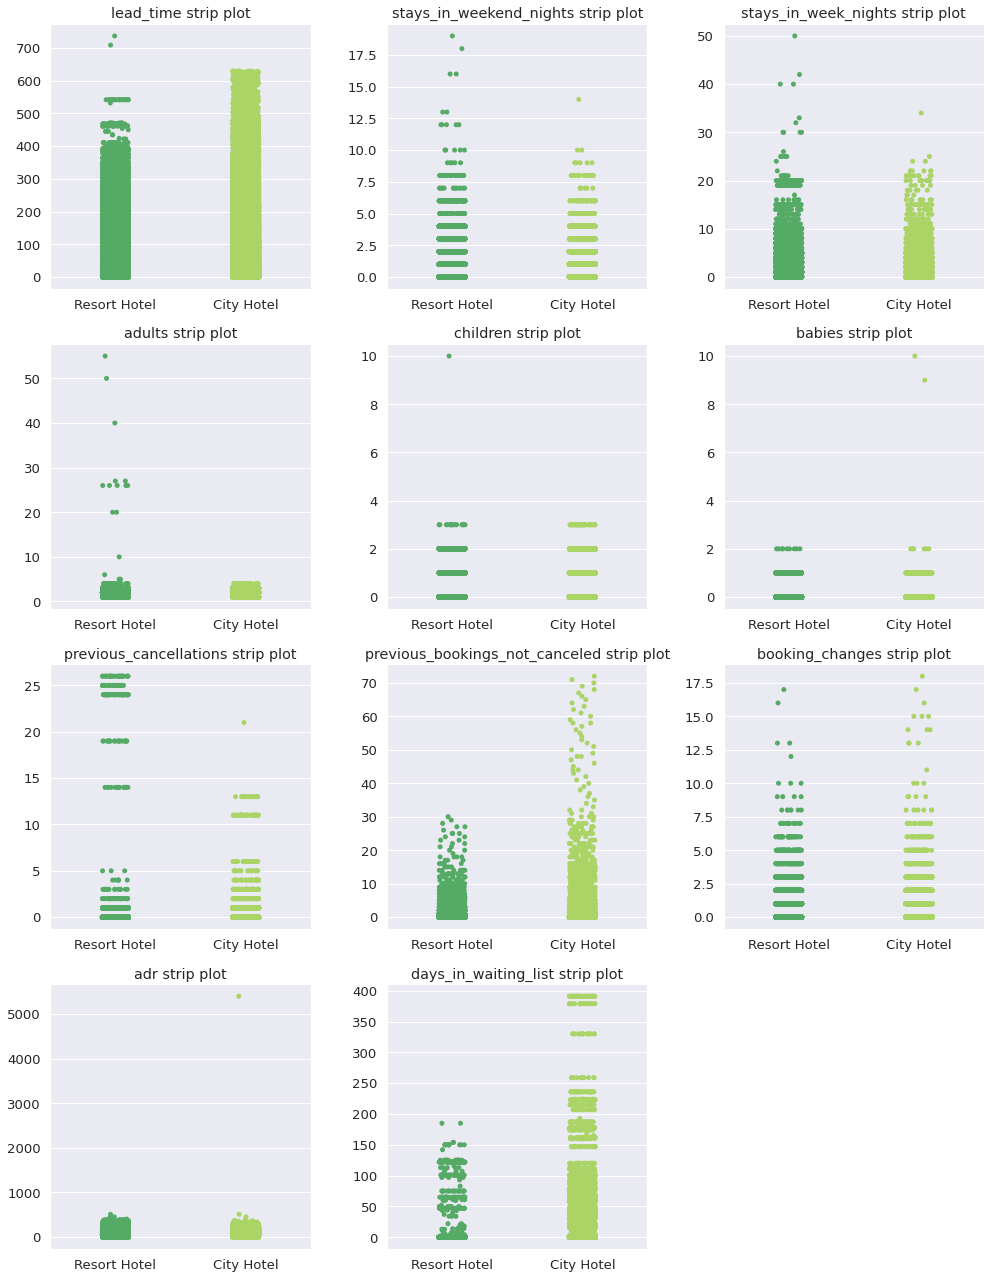

In [60]:
# Creating a stripplot to visualize differences in data distribution between hotels

features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'days_in_waiting_list']

n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (14, 18))

for feature in features:
    plt.subplot(4,3,n)
    sns.stripplot(x = df['hotel'], y = df[feature], palette = 'summer').set(xlabel = None, ylabel = None)
    plt.title(f'{feature} strip plot')
    n = n + 1
    plt.tight_layout()

We can draw some interesting ideas from this:

In the **lead_time** column the data start to become more dispersed starting at the 400 value, approximately.

The **stays_in_weekend_nights** and **stays_in_week_nights** columns show higher outliers for the resort than for the city hotel, although both hotels start to show more dispersed data at 6 and 10 days, for each column.

In the case of the **number of adults** per reservation, it is clear that the outliers are only for the resort, as the distribution for the city hotel is not very dispersed. Therefore, it could be true that the resort we are studying has villas or offers services to large groups of guests, which would explain why there are reservations for a large number of adults. However, we still do not know what type of rooms the hotel has (as they are classified with letters to anonymize the data) so we cannot reach a conclusion on this basis. The only thing we can state is that the data are concentrated, for both hotels, between values 1 and 4, being unusual any reservation that exceeds this number.

In the **children** and **babies** columns we can see three data points with very high values, enough to think that it could be an error when entering the booking data.

The **booking_changes** variable has a similar distribution for both hotels, seeing that it is extremely unusual for a booking to make more than 5 changes.

As I said before, the **adr** (Average Daily Rate) variable has an outlier with a particularly high value for the city hotel. Since this could be an error, it would be better to remove it. 

The **days_in_waiting_list** column refers to the number of days that elapsed from the time the reservation was made until it was confirmed to the client. According to the strip plot, the data is very sparse, being unusual for a reservation to have a waiting period of more than 1 day, practically.

Finally, in the **previous_cancellations** and **previous_bookings_not_canceled** columns we can see the number of reservations, previous to the current one, that were or were not canceled by the client. According to the graph, we can see that these variables reach very high values. For example, in the resort, there are records in which the customer made more than 20 cancellations prior to the current booking. 

At first it seems an illogical value. Exploring the dataset, we can find that most of these reservations were made by companies. Each time the same company rebooks, one of the two variables increases (depending, of course, on whether the previous booking was cancelled or not). Therefore, the high value of these variables could be explained by the presence of companies that regularly use these hotels to accommodate their employees.

However, it is also observed that there are bookings made by individuals where these variables reach high values. We can see this, for example, if we calculate the percentage of bookings made by companies and individuals, where the previous_bookings_not_canceled column has a value greater than 10 for the Resort.


In [101]:
# Number of bookings that have more than 10 previous bookings not canceled for resort

num_high_pb = len(df[(df['previous_bookings_not_canceled'] > 10) & (df['hotel'] == 'Resort Hotel')])


# Number of bookings made by companies that had more than 10 previous bookings not canceled for resort

num_companies_high_pb = len(df[(df['previous_bookings_not_canceled'] > 10) & (df['company'] > 0) & (df['hotel'] == 'Resort Hotel')])


# Number of bookings made by private individuals that had more than 10 previous bookings not canceled for resort

num_indiv_high_pb = len(df[(df['previous_bookings_not_canceled'] > 10) & (df['company'] == 0) & (df['hotel'] == 'Resort Hotel')])


# percentage of companies and individuals that had more than 10 previous cancellations for the resort

companies_high_pb_percent = round((num_companies_high_pb / num_high_pb) * 100, 2)
                            
indiv_high_pb_percent = round((num_indiv_high_pb / num_high_pb) * 100, 2)
    
print(f"\nBookings with high values in the previous_bookings_not_canceled column for the Resort Hotel:\n")
print(f"\t{companies_high_pb_percent} % were made by companies.")
print(f"\n\t{indiv_high_pb_percent} % were made by private individuals.")


Bookings with high values in the previous_bookings_not_canceled column for the Resort Hotel:

	70.89 % were made by companies.

	29.11 % were made by private individuals.


Hence, it would be incorrect to assume that all the outliers in these columns are due to the fact that they are bookings made by companies that use the services of these hotels on a regular basis. Consequently, I have decided that it is best to convert these variables into categorical variables, where 0 means that the client did not cancel or enjoy a reservation at the hotel prior to the current reservation and 1 means that it did occur, at least once.

Having analyzed all the columns of the graph, I will now deal with the outliers.

In [102]:
# Using loc[] to set new values for outliers

df.loc[df['lead_time'] > 380, ['lead_time']] = 380
df.loc[df['stays_in_weekend_nights']        > 6, ['stays_in_weekend_nights']       ] = 6
df.loc[df['stays_in_week_nights']           > 10, ['stays_in_week_nights']         ] = 10
df.loc[df['adults']                         > 4, ['adults']                        ] = 4
df.loc[df['children']                       > 8, ['lead_time']                     ] = 0
df.loc[df['babies']                         > 8, ['babies']                        ] = 0
df.loc[df['booking_changes']                > 5, ['booking_changes']               ] = 5
df.loc[df['days_in_waiting_list']           > 0, ['days_in_waiting_list']          ] = 1
df.loc[df['previous_cancellations']         > 0, ['previous_cancellations']        ] = 1
df.loc[df['previous_bookings_not_canceled'] > 0, ['previous_bookings_not_canceled']] = 1

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [107]:
# Dropping row with extreme outlier in adr column

df.drop(df[df['adr'] == 5400].index, inplace = True)

In [108]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000,118982.000000
mean,0.370728,102.458557,2016.156402,27.164092,15.797003,0.924526,2.478846,1.859895,0.100435,0.007791,0.031551,0.054437,0.030358,0.215251,75.015431,10.755215,0.031038,101.965982,0.062657,0.570624
std,0.483002,101.637346,0.707725,13.599001,8.781137,0.977161,1.758879,0.478169,0.390224,0.089345,0.174802,0.226879,0.171570,0.597593,107.232303,53.879477,0.173422,48.052873,0.245549,0.792401
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,380.000000,2017.000000,53.000000,31.000000,6.000000,10.000000,4.000000,10.000000,2.000000,1.000000,1.000000,1.000000,5.000000,535.000000,543.000000,1.000000,510.000000,8.000000,5.000000


Outliers will not have completely disappeared, but they will no longer have such an impact on the results of the analysis.

## Duplicated data 

I will now check for duplicate rows and, if so, delete them.

In [109]:
# Counting duplicate data in dataframe

df.duplicated().sum()

32037

In [111]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,0.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,0.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,0.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,0.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,0.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


There are **32,037 duplicate rows** in the dataset.

In [112]:
# Dropping duplicate rows

df.drop_duplicates(inplace = True)

In [113]:
df.shape

(86945, 32)

# Data Preparation

In [114]:
# Converting datatypes to string

df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['previous_cancellations'] = df['previous_cancellations'].astype('str')
df['previous_bookings_not_canceled'] = df['previous_bookings_not_canceled'].astype('str')

In [115]:
# Creating arrival_date column and changing its datatype to datetime

df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors = 'coerce')

In [116]:
# Combining children and babies together as kids

df['kids'] = df['children'] + df['babies']

In [117]:
# Creating total_members column

df['total_members'] = df['kids'] + df['adults']

In [118]:
# Total nights per booking

df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [119]:
# Changing arrival_date_month column to show month number instead of month name

import datetime as dt

df['arrival_date_month'] = df['arrival_date'].dt.month

In [120]:
# Creating family column

df['family'] = np.where(df['kids'] > 0, '1', '0')

In [121]:
# Dataset with confirmed bookings only

confirmed_bookings = df[df['is_canceled'] == '0']

In [122]:
# Dataset with canceled bookings only

canceled_bookings = df[df['is_canceled'] == '1']

In [123]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,kids,total_members,total_nights,family
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0.0,2.0,0,0
1,Resort Hotel,0,380,2015,7,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0.0,2.0,0,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,2015-07-01,0.0,1.0,1,0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,2015-07-01,0.0,1.0,1,0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,98.00,0,1,Check-Out,2015-07-03,2015-07-01,0.0,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,96.14,0,0,Check-Out,2017-09-06,2017-08-30,0.0,2.0,7,0
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,225.43,0,2,Check-Out,2017-09-07,2017-08-31,0.0,3.0,7,0
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,157.71,0,4,Check-Out,2017-09-07,2017-08-31,0.0,2.0,7,0
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,104.40,0,0,Check-Out,2017-09-07,2017-08-31,0.0,2.0,7,0
